# How Does COVID Influence People's Travel
### Jack Liu, HCDE-410 final project, University Of Washington
### Introduction and background
COVID's dilemma is the most significant issue we've had to deal with in recent times. It has a huge impact on us and impacts our lives, particularly our trip plans. People need to stay home to keep safe, and their are also a lot of “ban laws” that limit flight and restrict people at home to control the pandemic. In China, there are some strict restrictions on flights. I read a number of articles regarding the Chinese civil aviation industry's report, and they indicate about 45 percent decline in domestic flights and about 85 percent drop in international flights.([source article but chinese](https://baijiahao.baidu.com/s?id=1728787497302380294&wfr=spider&for=pc)). I intend to return to China in summer 2020, but due to the new restriction rule, there are few planes available, and tickets often cost $10,000. Civil aviation, in my opinion, is one of the most severely impacted industry by COVID. However, I didn't know much about the United States. So it will be really interesting to instigate the situation in the United States.<br>
I'm going to use flight dataset for year 2018, 2019, 2020, and 2021 from [Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GED&QO_fu146_anzr=Nv4%20Pn44vr45) to see changes. 2019, 2018 are the year before pandemic, 2020 is the year during pandemic and 2021 is after pandemic. The dataset also contains both passenger(civil) and cargo flight information.
### Research questions
COVID definitely have some impact on our life. So, first I want to instigate during pandemic **dose COVID influence our mobility(can be represent by amount of flight and passengers). If so, how much it affecting on us**. Second, **which city being influenced the most**. Third, I'm also interested in **how does COVID affect our cargo transportation?**
- My hypothesis is their will be significantly(more than 50%) amount of passengers drop in 2020(pandemic year) as compare to non pandemic years. And also little(less than 10%) drop of cargo amount in pandemic years.
### Methodology
In order to make analysis, I'm going to use python and python librarys: pandas(process data), seaborn(make visualization), matplotlib(process graph) and geopandas(process map data). Also I'm going to ignored data with all three variable `PASSENGERS, FREIGHT, MAIL` equal 0 because those data netither belong to civil or cargo flight.
- To answer the first question: how does COVID influence our mobility:
    - We need to take look on amount of passengers and use descriptive statistics to look at the difference between pandemic and non pandemic years.
    1. Looking at variable `PASSENGERS` with value > 0 which means the flight is for passenger.
    2. Count all the passengers for each year and make comparisiont o see if the amount of flight increase or decrease..
    3. Calculate the percentage of difference for amount passengers in each year to verify my hypothesis.
    4. Make a histplot for passengers in each year to make direct comparison(descriptive statistics)
- To answer the second question: which city being influenced the most:
    - sds
- To answer the third question: will the COVID affect our cargo transportation:
    - We need to take look on amount of cargo flight and use descriptive statistics to look at the difference between pandemic and non pandemic years.

### Findings
### Limitations
My dataset has certain drawbacks, it only includes summary of flights but not scheduled flight. So the dataset will not give us all the flight and there is no direct indicator shows flight is canceled due to COVID. However, since the data only reveals a huge amount of decline in passengers but not cargo transport with no other "big event" occurred in addition to COVID, it's reasonable to assume that the decrease in travel is due to pandemic.
### Conclusion

## Data analysis:
First, we need to import all the filght data, us map data and librarys we need to use

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

us_map = "./map/s_22mr22.shp"
flight_2018 = pd.read_csv("./flight_2019.csv")
flight_2019 = pd.read_csv("./flight_2019.csv")
flight_2020 = pd.read_csv("./flight_2020.csv")
flight_2021 = pd.read_csv("./flight_2021.csv")


In [3]:
flight_2019

,PASSENGERS,FREIGHT,MAIL,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,QUARTER,MONTH,DISTANCE_GROUP
0,0.0,0.0,0.0,GL,Miami Air International,Miami Air International,14843,SJU,"San Juan, PR",PR,Puerto Rico,13303,MIA,"Miami, FL",FL,1,3,3
1,0.0,9671.0,0.0,SQ,Singapore Airlines Ltd.,Singapore Airlines Ltd.,12892,LAX,"Los Angeles, CA",CA,California,10744,BRL,"Burlington, IA",IA,2,5,4
2,0.0,1018039.0,0.0,5Y,Atlas Air Inc.,Atlas Air Inc.,10299,ANC,"Anchorage, AK",AK,Alaska,10994,CHS,"Charleston, SC",SC,2,6,8
3,0.0,3418580.0,0.0,5Y,Atlas Air Inc.,Atlas Air Inc.,10299,ANC,"Anchorage, AK",AK,Alaska,11193,CVG,"Cincinnati, OH",KY,2,6,7
4,0.0,1706230.0,0.0,5Y,Atlas Air Inc.,Atlas Air Inc.,10299,ANC,"Anchorage, AK",AK,Alaska,12217,HSV,"Huntsville, AL",AL,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252078,96984.0,505308.0,15979.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,10299,ANC,"Anchorage, AK",AK,Alaska,14747,SEA,"Seattle, WA",WA,3,7,3
252079,97011.0,473666.0,55963.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,Washington,10299,ANC,"Anchorage, AK",AK,2,6,3
252080,97098.0,592775.0,18834.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,10299,ANC,"Anchorage, AK",AK,Alaska,14747,SEA,"Seattle, WA",WA,3,8,3
252081,97329.0,210292.0,5431.0,DL,Delta Air Lines Inc.,Delta Air Lines Inc.,13204,MCO,"Orlando, FL",FL,Florida,10397,ATL,"Atlanta, GA",GA,1,3,1


#### Question part 1: 

In [2]:
flight_2019[flight_2019["ORIGIN_CITY_NAME"] == "Seattle, WA"]

,PASSENGERS,FREIGHT,MAIL,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,QUARTER,MONTH,DISTANCE_GROUP
977,0.0,52693.0,0.0,5Y,Atlas Air Inc.,Atlas Air Inc.,10559,BFI,"Seattle, WA",WA,Washington,10821,BWI,"Baltimore, MD",MD,4,10,5
1142,0.0,78476.0,0.0,5Y,Atlas Air Inc.,Atlas Air Inc.,14747,SEA,"Seattle, WA",WA,Washington,10821,BWI,"Baltimore, MD",MD,4,10,5
1243,0.0,35880.0,0.0,5X,United Parcel Service,United Parcel Service,10559,BFI,"Seattle, WA",WA,Washington,10713,BOI,"Boise, ID",ID,4,11,1
1244,0.0,49646.0,0.0,5X,United Parcel Service,United Parcel Service,10559,BFI,"Seattle, WA",WA,Washington,11884,GEG,"Spokane, WA",WA,4,11,1
1245,0.0,1036843.0,0.0,5X,United Parcel Service,United Parcel Service,10559,BFI,"Seattle, WA",WA,Washington,13891,ONT,"Ontario, CA",CA,4,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251888,65164.0,380776.0,53148.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,Washington,10299,ANC,"Anchorage, AK",AK,3,9,3
252038,80386.0,526417.0,61011.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,Washington,10299,ANC,"Anchorage, AK",AK,2,5,3
252067,91330.0,368246.0,63545.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,Washington,10299,ANC,"Anchorage, AK",AK,3,8,3
252079,97011.0,473666.0,55963.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,Washington,10299,ANC,"Anchorage, AK",AK,2,6,3


In [ ]:
month_data_2019 = flight_2019.groupby("")

In [ ]:
df = gpd.read_file(us_map)

<AxesSubplot:>

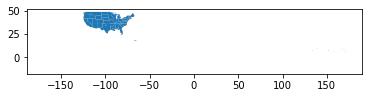

In [15]:
df = df[(df['NAME'] != 'Alaska') & (df['NAME'] != 'Hawaii')]
df.plot()
